# Exploring the CIC-IDS-2018 Dataset (processed_friday_dataset)
[Official dataset link](https://www.unb.ca/cic/datasets/ids-2018.html)

[Dataset Github processed_friday](https://github.com/tamerthamoqa/cic-ids-2018-intrusion-detection-classification/blob/master/1-Exploring_CIC-IDS-2018_Dataset.ipynb)

Based on the following exploration; The __"Friday-02-03-2018_TrafficForML_CICFlowMeter.csv"__ and __"Friday-16-02-2018_TrafficForML_CICFlowMeter.csv"__ (friday 1 and friday 2) csv files were chosen with the following labels:
* __Benign__ 
* __Bot__ 
* __DoS attacks-SlowHTTPTest__ 
* __DoS attacks-Hulk__ 
* Label (one erroneous row, would need to be removed)

__Reasoning__: The labels are better balanced than the rest of the files. For the purposes of a baseline experiment; it would be satisfactory.

The __Bot__, __DoS attacks-SlowHTTPTest__, and __DoS attacks-Hulk__ labels would be combined into one __"Malicious"__ label for a total of 290,089 __"Malicious"__ instances

The baseline experiment would be a binary classification experiment between __290089 "Malicious"__ instances vs __1074342 "Benign"__ instances: 

Malicious: 21.260%, Benign: 78.739%.

In [1]:
# Import modules
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from minisom import MiniSom
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve

In [2]:
# Import dataset
data = pd.read_csv("/users/mik2002/dataset/processed_friday_dataset.csv")
pd.set_option('display.max_columns', None)
display(data.head(10))

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,9.425667e+03,1.906912e+04,73403.0,1.0,141385.0,1.767312e+04,2.396532e+04,73403.0,22.0,51417.0,8569.500000,13036.89082,31525.0,1.0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,1.405000e+02,1.746554e+02,264.0,17.0,281.0,2.810000e+02,0.000000e+00,281.0,281.0,0.0,0.000000,0.00000,0.0,0.0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,1.119296e+04,2.437945e+04,112589.0,1.0,279728.0,2.797280e+04,3.616774e+04,112589.0,94.0,258924.0,18494.571430,36356.50372,133669.0,1.0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,1.320000e+02,0.000000e+00,132.0,132.0,132.0,1.320000e+02,0.000000e+00,132.0,132.0,0.0,0.000000,0.00000,0.0,0.0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,1.304838e+04,2.631163e+04,114077.0,1.0,273946.0,3.424325e+04,3.799657e+04,114077.0,201.0,252994.0,21082.833330,39075.73819,135611.0,1.0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
5,250,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,2.500000e+02,0.000000e+00,250.0,250.0,250.0,2.500000e+02,0.000000e+00,250.0,250.0,0.0,0.000000,0.00000,0.0,0.0,40,0,8000.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,251,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
6,5964033,3,1,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,1.988011e+06,3.425210e+06,5943084.0,19.0,5964033.0,2.982016e+06,4.187582e+06,5943084.0,20949.0,0.0,0.000000,0.00000,0.0,0.0,72,32,0.503015,0.167672,0,0,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,1,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,3,0,1,0,8192,29200,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
7,144,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,1.440000e+02,0.000000e+00,144.0,144.0,144.0,1.440000e+02,0.000000e+00,144.0,144.0,0.0,0.000000,0.00000,0.0,0.0,40,0,13888.888890,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,913,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,

In [3]:
# Visualize and drop empties columns
columns_empties = ['Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg','CWE Flag Count','Bwd Blk Rate Avg']
# for column in columns_empties:
#    print(data[column].value_counts())
data = data.drop(columns=columns_empties)

In [4]:
# Visualize label of dataset
display(data['Label'].value_counts())

Label
0    1074342
1     290089
Name: count, dtype: int64

In [5]:
# split dataset in data and target 
target = data.iloc[:len(data),-1].values
label_names = {0:'Benign', 1:'Malicious'}
data = data.iloc[:len(data),:-1]
data.shape

(1364431, 65)

In [6]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [7]:
# split data in Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(data, target)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1023323 samples.
Testing set has 341108 samples.


In [8]:
# since this in supervised classification not unsupervised, this function chooses the class of
# the BMU to be the final class of each instance
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [9]:
# set hyperparameters
n_neurons = 75
m_neurons = 75
input_len = X_train.shape[1]
sigma = 1.5
learning_rate = 1.2
iterations = X_train.shape[0]

In [10]:
from minisom import MiniSom
# initialization
som = MiniSom(x=n_neurons, y=m_neurons,input_len=input_len,sigma=sigma,learning_rate=learning_rate)
som.random_weights_init(X_train)

In [11]:
som.train(X_train, iterations, verbose=True)  # random training

 [ 1023323 / 1023323 ] 100% - 0:00:00 left 
 quantization error: 0.007973526072094943


In [12]:
print('Topographic Error for the classifier is ', som.topographic_error(X_train))

Quantization Error for the classifier is  0.007973526072094943
Topographic Error for the classifier is  0.10507923695646439


In [13]:
y_pred = classify(som, X_test)
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9993    0.9988    0.9990    268674
           1     0.9954    0.9975    0.9965     72434

    accuracy                         0.9985    341108
   macro avg     0.9974    0.9981    0.9977    341108
weighted avg     0.9985    0.9985    0.9985    341108



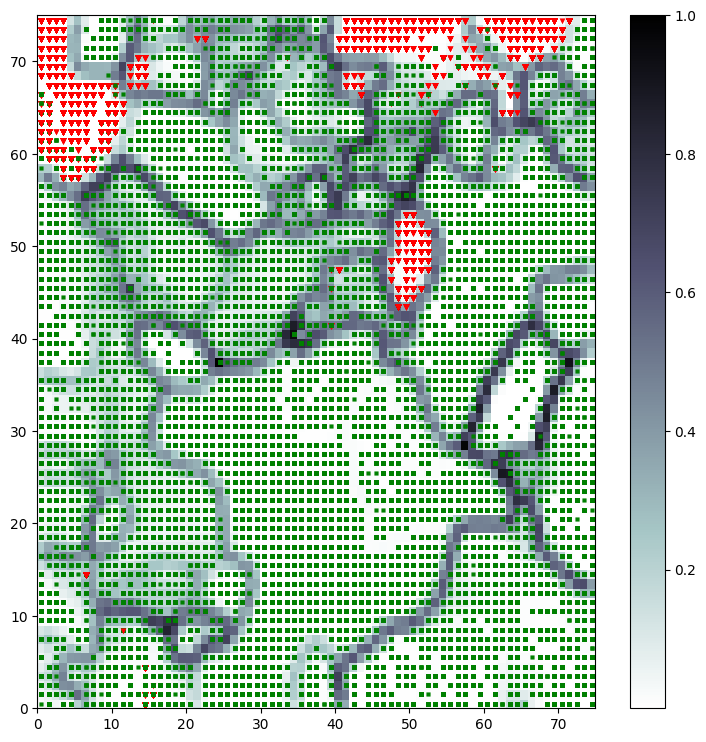

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the processed_friday_dataset
# different colors and markers for each label
markers = ['s', 'v']
colors = ['g', 'r']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor=colors[target[cnt]],
             markeredgecolor=colors[target[cnt]], markersize=1, markeredgewidth=2)

plt.show()

Percentage distribution (6232/1364431)*100) at the densest point: 0.4567471715315762%


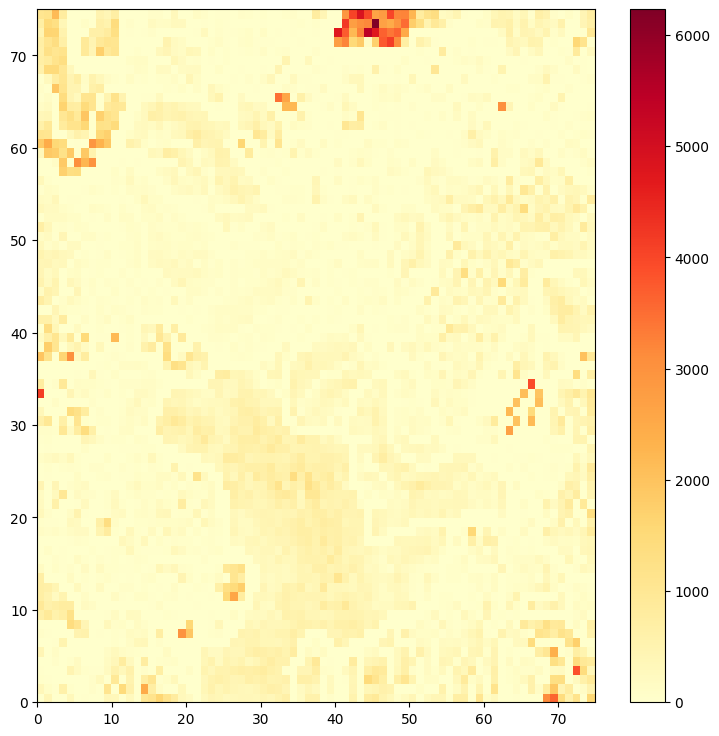

In [15]:
# Compute the activation map
frequencies = som.activation_response(data)

# Find the maximum value in the activation map
max_value = np.max(frequencies)

# Calculate the percentage distribution at the densest point
densest_point_percentage = (max_value / len(data)) * 100

# Print the percentage distribution
print(f"Percentage distribution ({int(max_value)}/{len(data)})*100) at the densest point: {densest_point_percentage}%")

# Display the activation map
plt.figure(figsize=(9, 9))
plt.pcolor(frequencies.T,cmap='YlOrRd')
plt.colorbar()
plt.show()
